In [0]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
G=nx.Graph()

In [6]:
f=open('C_Neighborhood_1.txt', 'r')
count=0
nodes = []
edges = []
for line in f:
  count+=1
  each = line.strip().split('\t')
  for i in range(1,len(each)):
    temptuple=(each[0],each[i])
    edges.append(temptuple)
  nodes.append(each[0])
  if count<10:
    print(each)
    print('This is nodes:')
    print(nodes)
    print('That is edges:')
    print(edges)
print('total number of rows %d' %(count))
f.close()

['6745388', '24988750']
This is nodes:
['6745388']
That is edges:
[('6745388', '24988750')]
['37960580', '64176222']
This is nodes:
['6745388', '37960580']
That is edges:
[('6745388', '24988750'), ('37960580', '64176222')]
['25588696', '39087481', '27588516', '74384304', '75057241', '21289083', '28088471', '2681757', '81583656', '29388354', '445955']
This is nodes:
['6745388', '37960580', '25588696']
That is edges:
[('6745388', '24988750'), ('37960580', '64176222'), ('25588696', '39087481'), ('25588696', '27588516'), ('25588696', '74384304'), ('25588696', '75057241'), ('25588696', '21289083'), ('25588696', '28088471'), ('25588696', '2681757'), ('25588696', '81583656'), ('25588696', '29388354'), ('25588696', '445955')]
['33951940', '84365404']
This is nodes:
['6745388', '37960580', '25588696', '33951940']
That is edges:
[('6745388', '24988750'), ('37960580', '64176222'), ('25588696', '39087481'), ('25588696', '27588516'), ('25588696', '74384304'), ('25588696', '75057241'), ('25588696', 

In [7]:
G=nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3856
Number of edges: 4737
Average degree:   2.4570


In [0]:
import pandas as pd
elink1=[]
preds1 = nx.adamic_adar_index(G, list(G.edges()))
for u,v,aa in preds1:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(aa)
  elink1.append(val)

df_elink1 = pd.DataFrame(elink1)
df_elink1['u'], df_elink1['v'] = df_elink1[0].str.split(',', 1).str
df_elink1['v1'], df_elink1['aa']= df_elink1['v'].str.split(',', 1).str
df_elink1.drop('v', axis=1, inplace=True)
df_elink1.drop(0, axis=1, inplace=True)
df_elink1.rename(columns={'v1': 'v'}, inplace=True)
df_elink1.rename(columns={'v': 'des_node'}, inplace=True)
df_elink1.rename(columns={'u': 'src_node'}, inplace=True)

In [0]:
#df_elink1.head()

,src_node,des_node,aa
0,6745388,24988750,0
1,37960580,64176222,0
2,25588696,39087481,0.9441248940643607
3,25588696,27588516,0.3668929476389716
4,25588696,74384304,0


In [0]:
elink2=[]
preds2 = nx.jaccard_coefficient(G, list(G.edges()))
for u,v,jc in preds2:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(jc)
  elink2.append(val)

df_elink2 = pd.DataFrame(elink2)
df_elink2['u'], df_elink2['v'] = df_elink2[0].str.split(',', 1).str
df_elink2['v1'], df_elink2['jc']= df_elink2['v'].str.split(',', 1).str
df_elink2.drop('v', axis=1, inplace=True)
df_elink2.drop(0, axis=1, inplace=True)
df_elink2.rename(columns={'v1': 'v'}, inplace=True)
df_elink2.rename(columns={'v': 'des_node'}, inplace=True)
df_elink2.rename(columns={'u': 'src_node'}, inplace=True)

In [0]:
elink3=[]
preds3 = nx.resource_allocation_index(G, list(G.edges()))
for u,v,ra in preds3:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(ra)
  elink3.append(val)

df_elink3 = pd.DataFrame(elink3)
df_elink3['u'], df_elink3['v'] = df_elink3[0].str.split(',', 1).str
df_elink3['v1'], df_elink3['ra']= df_elink3['v'].str.split(',', 1).str
df_elink3.drop('v', axis=1, inplace=True)
df_elink3.drop(0, axis=1, inplace=True)
df_elink3.rename(columns={'v1': 'v'}, inplace=True)
df_elink3.rename(columns={'v': 'des_node'}, inplace=True)
df_elink3.rename(columns={'u': 'src_node'}, inplace=True)

In [0]:
elink4=[]
preds4 = nx.preferential_attachment(G, list(G.edges()))
for u,v,pa in preds4:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(pa)
  elink4.append(val)

df_elink4 = pd.DataFrame(elink4)
df_elink4['u'], df_elink4['v'] = df_elink4[0].str.split(',', 1).str
df_elink4['v1'], df_elink4['pa']= df_elink4['v'].str.split(',', 1).str
df_elink4.drop('v', axis=1, inplace=True)
df_elink4.drop(0, axis=1, inplace=True)
df_elink4.rename(columns={'v1': 'v'}, inplace=True)
df_elink4.rename(columns={'v': 'des_node'}, inplace=True)
df_elink4.rename(columns={'u': 'src_node'}, inplace=True)

In [0]:
#df_elink2.head()

df_elink = pd.merge(df_elink1, df_elink2,  on = ['src_node','des_node'])

df_elink_m1 = pd.merge(df_elink,df_elink3,on = ['src_node','des_node'])

df_elink = pd.merge(df_elink_m1,df_elink4,on = ['src_node','des_node'])

In [13]:
df_elink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4737 entries, 0 to 4736
Data columns (total 6 columns):
src_node    4737 non-null object
des_node    4737 non-null object
aa          4737 non-null object
jc          4737 non-null object
ra          4737 non-null object
pa          4737 non-null object
dtypes: object(6)
memory usage: 259.1+ KB


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train_p, x_test_p, y_train_p, y_test_p  = train_test_split(df_elink,np.ones(len(df_elink)),test_size=0.2, random_state=9)

In [47]:
y_test_p

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [0]:
plink=[]
for i in range(len(G.nodes())):
  for j in range(i+1,len(G.nodes())):
    plink.append((list(G.nodes())[i],list(G.nodes())[j]))  

In [16]:
%%time
plink1=[]
preds1 = nx.adamic_adar_index(G, plink)
for u,v,aa in preds1:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(aa)
  plink1.append(val)

df_plink1 = pd.DataFrame(plink1)
df_plink1['u'], df_plink1['v'] = df_plink1[0].str.split(',', 1).str
df_plink1['v1'], df_plink1['aa']= df_plink1['v'].str.split(',', 1).str
df_plink1.drop('v', axis=1, inplace=True)
df_plink1.drop(0, axis=1, inplace=True)
df_plink1.rename(columns={'v1': 'v'}, inplace=True)
df_plink1.rename(columns={'v': 'des_node'}, inplace=True)
df_plink1.rename(columns={'u': 'src_node'}, inplace=True)

CPU times: user 2min 5s, sys: 2.64 s, total: 2min 8s
Wall time: 2min 8s


In [17]:
%%time
plink2=[]
preds2 = nx.jaccard_coefficient(G, plink)
for u,v,jc in preds2:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(jc)
  plink2.append(val)

df_plink2 = pd.DataFrame(plink2)
df_plink2['u'], df_plink2['v'] = df_plink2[0].str.split(',', 1).str
df_plink2['v1'], df_plink2['jc']= df_plink2['v'].str.split(',', 1).str
df_plink2.drop('v', axis=1, inplace=True)
df_plink2.drop(0, axis=1, inplace=True)
df_plink2.rename(columns={'v1': 'v'}, inplace=True)
df_plink2.rename(columns={'v': 'des_node'}, inplace=True)
df_plink2.rename(columns={'u': 'src_node'}, inplace=True)

CPU times: user 2min 50s, sys: 1.93 s, total: 2min 52s
Wall time: 2min 52s


In [18]:
%%time
plink3=[]
preds3 = nx.resource_allocation_index(G, plink)
for u,v,ra in preds3:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(ra)
  plink3.append(val)

df_plink3 = pd.DataFrame(plink3)
df_plink3['u'], df_plink3['v'] = df_plink3[0].str.split(',', 1).str
df_plink3['v1'], df_plink3['ra']= df_plink3['v'].str.split(',', 1).str
df_plink3.drop('v', axis=1, inplace=True)
df_plink3.drop(0, axis=1, inplace=True)
df_plink3.rename(columns={'v1': 'v'}, inplace=True)
df_plink3.rename(columns={'v': 'des_node'}, inplace=True)
df_plink3.rename(columns={'u': 'src_node'}, inplace=True)

CPU times: user 2min 24s, sys: 1.54 s, total: 2min 25s
Wall time: 2min 25s


In [19]:
%%time
plink4=[]
preds4 = nx.preferential_attachment(G, plink)
for u,v,pa in preds4:
  #print ('(%s, %s) -> %f' % (u, v, pa))
  val = u+","+v+","+str(pa)
  plink4.append(val)

df_plink4 = pd.DataFrame(plink4)
df_plink4['u'], df_plink4['v'] = df_plink4[0].str.split(',', 1).str
df_plink4['v1'], df_plink4['pa']= df_plink4['v'].str.split(',', 1).str
df_plink4.drop('v', axis=1, inplace=True)
df_plink4.drop(0, axis=1, inplace=True)
df_plink4.rename(columns={'v1': 'v'}, inplace=True)
df_plink4.rename(columns={'v': 'des_node'}, inplace=True)
df_plink4.rename(columns={'u': 'src_node'}, inplace=True)

CPU times: user 2min 3s, sys: 1.49 s, total: 2min 5s
Wall time: 2min 5s


In [20]:
df_plink1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432440 entries, 0 to 7432439
Data columns (total 3 columns):
src_node    object
des_node    object
aa          object
dtypes: object(3)
memory usage: 170.1+ MB


In [0]:
df_plink = pd.merge(df_plink1, df_plink2,  on = ['src_node','des_node'])

df_plink_m1 = pd.merge(df_plink,df_plink3,on = ['src_node','des_node'])

df_plink = pd.merge(df_plink_m1,df_plink4,on = ['src_node','des_node'])

In [26]:
df_plink.head()

,src_node,des_node,aa,jc,ra,pa
0,6745388,37960580,0,0.0,0,1
1,6745388,25588696,0,0.0,0,10
2,6745388,33951940,0,0.0,0,1
3,6745388,50150482,0,0.0,0,1
4,6745388,30379264,0,0.0,0,2


In [0]:
x_train_n, x_test_n, y_train_n, y_test_n  = train_test_split(df_plink,np.zeros(len(df_plink)),test_size=0.2, random_state=9)

In [50]:
y_test_n

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
df_final_train = x_train_p.append(x_train_n,ignore_index=True)
y_final_train = np.concatenate((y_train_p,y_train_n))
df_final_test = x_test_p.append(x_test_n,ignore_index=True)
y_final_test = np.concatenate((y_test_p,y_test_n))

In [52]:
df_final_train.info()#y_final_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949741 entries, 0 to 5949740
Data columns (total 6 columns):
src_node    object
des_node    object
aa          object
jc          object
ra          object
pa          object
dtypes: object(6)
memory usage: 272.4+ MB


In [0]:
#dependent varible i.e link exist or not
df_final_train['indicator_link'] = y_final_train

In [54]:
df_final_train.head()

,src_node,des_node,aa,jc,ra,pa,indicator_link
0,23088921,21289083,2.6608925235598204,0.04433497536945813,0.3193174206441469,2400,1.0
1,43178112,22452975,0,0.0,0,20,1.0
2,24388804,46468815,0,0.0,0,81,1.0
3,83065521,97564216,0,0.0,0,60,1.0
4,61076501,26379624,0,0.0,0,8,1.0


In [0]:
df_final_test['indicator_link'] = y_final_test

In [0]:
#df_final_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1114168 entries, 1422 to 2231152
Data columns (total 12 columns):
src_node           1114168 non-null object
des_node           1114168 non-null object
pa                 1114168 non-null object
indicator_link     1114168 non-null float64
index              1114168 non-null object
common_neigh       1114168 non-null float64
jaccard            1114168 non-null float64
resource_alloc     1114168 non-null float64
adamic_adar        1114168 non-null float64
pref_attachment    1114168 non-null float64
first_node         1114168 non-null object
second_node        1114168 non-null object
dtypes: float64(6), object(6)
memory usage: 110.5+ MB


In [0]:
#df_final_train1.head()

,src_node,des_node,pa,indicator_link,index,common_neigh,jaccard,resource_alloc,adamic_adar,pref_attachment,first_node,second_node
3318,94373504,3772658,0,0.0,"(94373504, 3772658)",0.0,0.0,0.0,0.0,0.000028,94373504,3772658
3319,46659797,33261003,0,0.0,"(46659797, 33261003)",0.0,0.0,0.0,0.0,0.000000,46659797,33261003
3321,79474845,19171272,0,0.0,"(79474845, 19171272)",0.0,0.0,0.0,0.0,0.000084,79474845,19171272
3322,70884619,20953110,0,0.0,"(70884619, 20953110)",0.0,0.0,0.0,0.0,0.000000,70884619,20953110
3326,9745118,96946270,0,0.0,"(9745118, 96946270)",0.0,0.0,0.0,0.0,0.000000,9745118,96946270


In [0]:
y_train = df_final_train.indicator_link 
y_test = df_final_test.indicator_link

In [0]:
df_final_train1=df_final_train
df_final_test1=df_final_test

In [58]:
df_final_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5949741 entries, 0 to 5949740
Data columns (total 7 columns):
src_node          object
des_node          object
aa                object
jc                object
ra                object
pa                object
indicator_link    float64
dtypes: float64(1), object(6)
memory usage: 317.8+ MB


In [0]:
df_final_train1.drop(['src_node', 'des_node','indicator_link'],axis=1,inplace=True)
df_final_test1.drop(['src_node', 'des_node','indicator_link'],axis=1,inplace=True)

In [60]:
df_final_train1.head()

,aa,jc,ra,pa
0,2.6608925235598204,0.04433497536945813,0.3193174206441469,2400
1,0,0.0,0,20
2,0,0.0,0,81
3,0,0.0,0,60
4,0,0.0,0,8


In [61]:
y_train

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
5949736    0.0
5949737    0.0
5949738    0.0
5949739    0.0
5949740    0.0
Name: indicator_link, Length: 5949741, dtype: float64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(df_final_train1,y_train)
predicted_classes = model.predict(df_final_test1)
accuracy = accuracy_score(y_test,predicted_classes)
parameters = model.coef_

In [72]:
parameters

array([[3.02277516e+00, 1.70383175e-01, 6.21394143e-01, 2.06380833e-04]])

In [73]:
accuracy

0.9993505602930143

In [0]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(df_final_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


In [76]:
roc_auc

0.9233789274771672

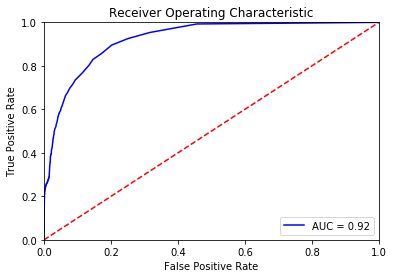

In [75]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()